In [0]:
'''
This is a very basic example of AutoEncoders.
Used for image compression , can be thought as PCA
'''

In [0]:
# Importing the basic libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# Importing the train and test data
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Scaling the data
X_train = X_train/255.0
X_test = X_test/255.0

# Reshaping the Data
X_train = X_train.reshape(-1,(28*28))
X_test = X_test.reshape(-1,(28*28))

In [0]:
# Defining our model
model = Sequential()

# Encoding
model.add(Dense(units = 128,activation='relu',input_dim=784))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 32,activation='relu'))
model.add(Dense(units = 16,activation='relu'))
model.add(Dense(units = 8,activation='relu'))

# Decoding
model.add(Dense(units = 16,activation='relu'))
model.add(Dense(units = 32,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 128,activation='relu'))
model.add(Dense(units = 784,activation='sigmoid'))

In [0]:
# Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
# Fitting the model change as per need
model.fit(X_train,X_train,epochs=25,batch_size=32,validation_data=(X_test,X_test))

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1958 - accuracy: 0.0102 - val_loss: 0.1596 - val_accuracy: 0.0114
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1519 - accuracy: 0.0086 - val_loss: 0.1443 - val_accuracy: 0.0105
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1425 - accuracy: 0.0083 - val_loss: 0.1383 - val_accuracy: 0.0095
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1361 - accuracy: 0.0094 - val_loss: 0.1334 - val_accuracy: 0.0101
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1324 - accuracy: 0.0092 - val_loss: 0.1304 - val_accuracy: 0.0105
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1301 - accuracy: 0.0092 - val_loss: 0.1288 - val_accuracy: 0.0098
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1285 - accuracy: 0.0101 - val_loss: 0.1275 - val_accuracy:

In [0]:
# Predicting the Output

prediction = model.predict(X_test)

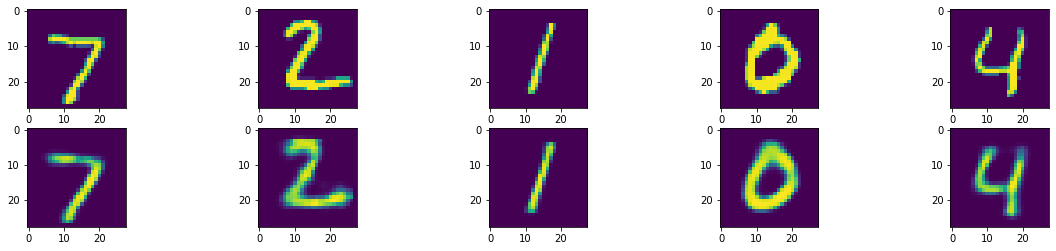

In [0]:
# Plotting the actual and predicted image

num = 5
plt.figure(figsize=(20,4))

for i in range(num):
  ax = plt.subplot(2,num,i+1)
  plt.imshow(X_test[i].reshape(28,28))

  ax = plt.subplot(2,num,i+1+num)
  plt.imshow(prediction[i].reshape(28,28))